In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv('../data/plays_with_passer_expanded_with_z_norm.csv', low_memory=False)
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,pass_forward_frame,ball_snap_frame,play_direction,frames_to_pass,seconds_since_pass,los_norm,start_x_norm,end_x_norm,start_y_norm,end_y_norm
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,36,11,left,25,2.5,40,33.10,46.71,26.33,6.83
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,31,11,left,20,2.0,40,34.39,43.69,23.62,16.91
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,34,11,left,23,2.3,40,34.49,37.41,24.64,47.49
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,39,11,left,28,2.8,40,30.60,61.83,26.24,41.47
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,31,11,left,20,2.0,40,33.52,41.95,28.86,10.88


In [3]:
df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'passer', 'v', 'vxy', 'vz', 'launch_angle', 'air_time', 'z_max',
       'distance', 'start_x', 'start_y', 'end_x', 'end_y',
       'pass_arrived_frame', 'pass_forward_frame', 'ball_snap_frame',
       'play_direction', 'frames_to_pass', 'seconds_since_pass', 'los_norm',
       'start_x_norm', 'end_x_norm', 'start_y_norm', 'end_y_norm'],
      dtype='object')

In [36]:
df = df.loc[(df.air_time>0)& (df.distance>0)]
df['air_x_yards'] = np.abs(df.end_x-df.start_x)

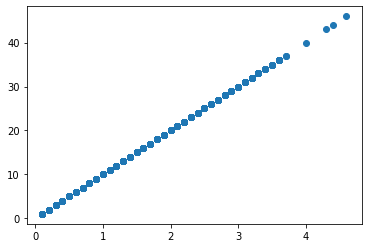

In [37]:
import matplotlib.pyplot as plt


plt.scatter(df.air_time, df.pass_arrived_frame-df.pass_forward_frame)
plt.show()

In [38]:
df.air_time.count()

17224

array([[<AxesSubplot:title={'center':'air_time'}>]], dtype=object)

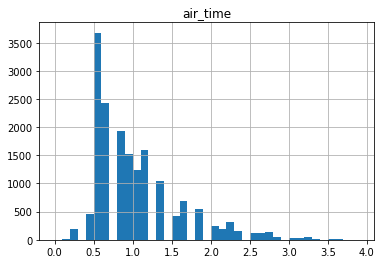

In [39]:
df.hist(column='air_time',bins=[0.1*x for x in range(40)])

In [40]:
df.air_time.describe()

count    17224.000000
mean         1.026364
std          0.555888
min          0.100000
25%          0.600000
50%          0.800000
75%          1.200000
max          4.600000
Name: air_time, dtype: float64

In [41]:
df.air_time.quantile([0.001, 0.01, 0.05] + [0.1*x for x in range(1, 10, 1)]+[0.95, 0.99, 0.999])

0.001    0.1
0.010    0.3
0.050    0.5
0.100    0.5
0.200    0.6
0.300    0.7
0.400    0.8
0.500    0.8
0.600    1.0
0.700    1.1
0.800    1.4
0.900    1.8
0.950    2.2
0.990    2.9
0.999    3.5
Name: air_time, dtype: float64

In [42]:
df['complete'] = np.where(df.passResult=='C', 1, 0)

In [43]:
df.loc[df.air_time<0.4].complete.mean()

0.6792452830188679

In [46]:
df.loc[df.air_time<0.4][['passer', 'air_time', 'offensePlayResult', 'distance', 'air_x_yards', 'passResult', 'complete']].loc[df.complete==1].sort_values('distance', ascending=False).head(15)

,passer,air_time,offensePlayResult,distance,air_x_yards,passResult,complete
10630,R.Fitzpatrick,0.3,2,8.542424,5.97,C,1
5664,B.Mayfield,0.3,5,8.213379,8.10,C,1
9983,D.Carr,0.3,12,7.437937,6.70,C,1
4769,P.Mahomes,0.3,14,7.268906,6.57,C,1
6163,J.Rosen,0.3,26,6.008735,3.68,C,1
4810,B.Bortles,0.3,11,5.975215,1.66,C,1
3876,T.Brady,0.3,8,5.637349,2.94,C,1
10659,D.Watson,0.3,6,5.459386,5.45,C,1
9975,P.Rivers,0.3,-5,5.361576,4.21,C,1
11785,E.Manning,0.3,5,5.134871,2.38,C,1
